<a href="https://colab.research.google.com/github/siva-sankar-a/erav1/blob/main/session_8_cifar_10_50k_20_epochs_regularization/Session_8_CIFAR10_group_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ERA V1 Session 8
## Refer [link](https://github.com/siva-sankar-a/erav1/tree/session/session-6-multiple-architecture-check/session_6_multiple_architectures_mnist#readme) for further documentation

## Cloning the Github repository
## [Session 8](https://github.com/siva-sankar-a/erav1.git)

In [1]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=a229c5bad07f7cb1512d16a611a44d1cb4dbd271af0469469d98f758a2b465d5
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [2]:
!git clone https://github.com/siva-sankar-a/erav1.git

Cloning into 'erav1'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 219 (delta 39), reused 20 (delta 8), pack-reused 140
Receiving objects: 100% (219/219), 622.47 KiB | 5.66 MiB/s, done.
Resolving deltas: 100% (110/110), done.


In [3]:
%cd /content/erav1

/content/erav1


In [4]:
!git pull

Already up to date.


## Adding the session folder to path in order to access the functions defined

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import sys

In [7]:
sys.path.append('/content/erav1/session_8_cifar_10_50k_20_epochs_regularization')

In [8]:
import importlib

In [9]:
import utils as U
import datasets as ds
import transforms as tf

In [ ]:
U = importlib.reload(U)
ds = importlib.reload(ds)
tf = importlib.reload(tf)

## Get device

In [10]:
device = U.get_device()
print(device)

CUDA Available? True
cuda


In [11]:
import pandas as pd

In [12]:
pd.options.plotting.backend = "plotly"

## Get train and test transforms

In [13]:
train_transforms = tf.get_train_transforms()
test_transforms = tf.get_test_transforms()

In [14]:
from torchvision import datasets, transforms
import numpy as np

In [15]:
from torch.utils.data import WeightedRandomSampler

In [16]:
def cutout(mask_size, p, cutout_inside, mask_color=(0, 0, 0)):
    mask_size_half = mask_size // 2
    offset = 1 if mask_size % 2 == 0 else 0

    def _cutout(image):
        image = np.asarray(image).copy()

        if np.random.random() > p:
            return image

        h, w = image.shape[:2]

        if cutout_inside:
            cxmin, cxmax = mask_size_half, w + offset - mask_size_half
            cymin, cymax = mask_size_half, h + offset - mask_size_half
        else:
            cxmin, cxmax = 0, w + offset
            cymin, cymax = 0, h + offset

        cx = np.random.randint(cxmin, cxmax)
        cy = np.random.randint(cymin, cymax)
        xmin = cx - mask_size_half
        ymin = cy - mask_size_half
        xmax = xmin + mask_size
        ymax = ymin + mask_size
        xmin = max(0, xmin)
        ymin = max(0, ymin)
        xmax = min(w, xmax)
        ymax = min(h, ymax)
        image[ymin:ymax, xmin:xmax] = mask_color
        return image

    return _cutout

In [17]:
train_transforms = transforms.Compose([
                                    # transforms.RandomRotation((-5.0, 5.0), fill=(1,)),
                                    # transforms.ElasticTransform(alpha=100.0, sigma=5.0, interpolation=transforms.InterpolationMode.NEAREST),
                                    # transforms.RandomInvert(p=0.5),
                                    cutout(16, 0.5, True),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.4913997551666284, 0.48215855929893703, 0.4465309133731618),
                                                          (0.24703225141799082, 0.24348516474564, 0.26158783926049628))
                                    ])

In [18]:
test_transforms = transforms.Compose([
                                    # transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.4913997551666284, 0.48215855929893703, 0.4465309133731618),
                                                          (0.24703225141799082, 0.24348516474564, 0.26158783926049628))
                                    ])

## Get dataset

In [19]:
train_dataset = ds.get_train_dataset(train_transforms)
test_dataset = ds.get_test_dataset(test_transforms)

100%|██████████| 170498071/170498071 [00:03<00:00, 44934880.63it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


## Get train and test dataloader

In [20]:
import torch

In [21]:
label_weights = { 0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}

In [22]:
_weights = [label_weights[label] for label in train_dataset.targets]

In [23]:
batch_size = 128
sampler = torch.utils.data.sampler.WeightedRandomSampler(_weights, len(train_dataset), replacement=False)

In [24]:
kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

train_dataloader = ds.get_train_dataloader(train_dataset, sampler=sampler, **kwargs)
test_dataloader = ds.get_test_dataloader(test_dataset, **kwargs)

## Display image grid

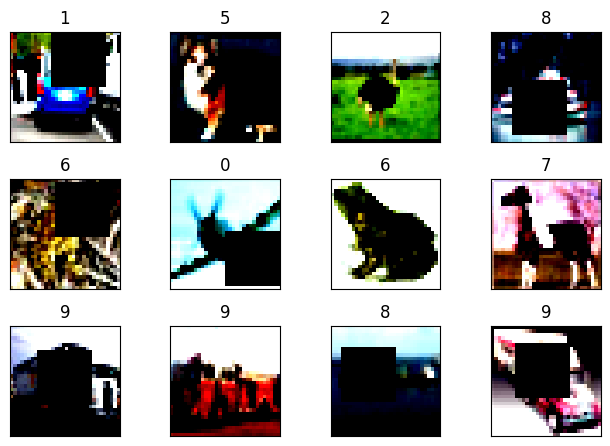

In [25]:
U.show_image_grid(train_dataloader)

In [26]:
!git clone https://github.com/Fangyh09/pytorch-receptive-field.git

Cloning into 'pytorch-receptive-field'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 111 (delta 37), reused 23 (delta 23), pack-reused 67
Receiving objects: 100% (111/111), 27.59 KiB | 2.12 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [27]:
sys.path.append('/content/erav1/pytorch-receptive-field')

In [28]:
from torch_receptive_field import receptive_field

In [29]:
import torch.nn as nn
from torchviz import make_dot
import torch.nn.functional as F

In [45]:
class Net(nn.Module):

    '''
    This class implements the neural network model

    Usage:
    >>> device = ...
    >>> model = Net().to('cpu')
    '''

    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = self.conv3x3_bn_dropout(3, 8, padding=1)
        self.conv2 = self.conv3x3_bn_dropout(8, 8, padding=1)
        self.conv3 = self.conv1x1(8, 8, padding=1)

        self.pool1 = self.conv3x3_bn_dropout(8, 16, stride=2)
        self.downsample1 = self.conv3x3_bn_dropout(3, 16, padding=1, stride=2)

        self.conv4 = self.conv3x3_bn_dropout(16, 16, padding=1)
        self.conv5 = self.conv3x3_bn_dropout(16, 16, padding=1)
        self.conv6 = self.conv3x3_bn_dropout(16, 16, padding=1)
        self.conv7 = self.conv1x1(16, 16, padding=1)

        self.pool2 = self.conv3x3_bn_dropout(16, 32, stride=2)
        self.downsample2 = self.conv3x3_bn_dropout(16, 32, padding=1, stride=2)

        self.conv8 = self.conv3x3_bn_dropout(32, 32, padding=1)
        self.conv9 = self.conv3x3_bn_dropout(32, 32, padding=1)
        self.conv10 = self.conv3x3_bn_dropout(32, 32, padding=1)

        self.gap = nn.AvgPool2d(8)
        self.mixer = nn.Sequential(
            self.conv1x1(32, 10),
        )


    def conv3x3_bn_dropout(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0, bias=False, dropout=0.1):
          if dropout:
            return nn.Sequential(
                self.conv3x3(in_channels, out_channels, kernel_size, stride, padding, bias),
                nn.ReLU(),
                nn.GroupNorm(4, out_channels),
                nn.Dropout(dropout),
                )
          else:
            return nn.Sequential(
                self.conv3x3(in_channels, out_channels, kernel_size, stride, padding, bias),
                nn.ReLU(),
                nn.GroupNorm(4, out_channels),
                )

    def conv3x3(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0, bias=False):
          return nn.Conv2d(in_channels,
                    out_channels,
                    kernel_size=kernel_size,
                    stride=stride,
                    padding=padding,
                    bias=bias)

    def conv1x1(self, in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False):
          return nn.Conv2d(in_channels,
                    out_channels,
                    kernel_size=kernel_size,
                    stride=stride,
                    padding=padding,
                    bias=bias)


    def forward(self, x):

        # Block 1
        i1 = x

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        # pooling
        x = self.pool1(x)

        # residual connection
        i1 = self.downsample1(i1)
        x = x + i1

        # Block 2
        i2 = x
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = self.conv7(x)
        # pooling
        x = self.pool2(x)

        # residual connection
        i2 = self.downsample2(i2)
        x = x + i2

        # Block 3
        i3 = x
        x = self.conv8(x)
        x = self.conv9(x)
        x = self.conv10(x)
        # residual connection
        x = x + i3

        x = self.gap(x)
        x = self.mixer(x)
        x = x.view(-1, 10)

        return F.log_softmax(x, dim=1)

## Generate model summary

In [46]:
from torchsummary import summary

In [47]:
model = Net().to('cpu')
summary(model, input_size=(3, 32, 32), batch_size=batch_size, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [128, 8, 32, 32]             216
              ReLU-2           [128, 8, 32, 32]               0
         GroupNorm-3           [128, 8, 32, 32]              16
           Dropout-4           [128, 8, 32, 32]               0
            Conv2d-5           [128, 8, 32, 32]             576
              ReLU-6           [128, 8, 32, 32]               0
         GroupNorm-7           [128, 8, 32, 32]              16
           Dropout-8           [128, 8, 32, 32]               0
            Conv2d-9           [128, 8, 34, 34]              64
           Conv2d-10          [128, 16, 16, 16]           1,152
             ReLU-11          [128, 16, 16, 16]               0
        GroupNorm-12          [128, 16, 16, 16]              32
          Dropout-13          [128, 16, 16, 16]               0
           Conv2d-14          [128, 16,

In [ ]:
receptive_field(model.cpu(), input_size=(3, 32, 32), device='cpu')

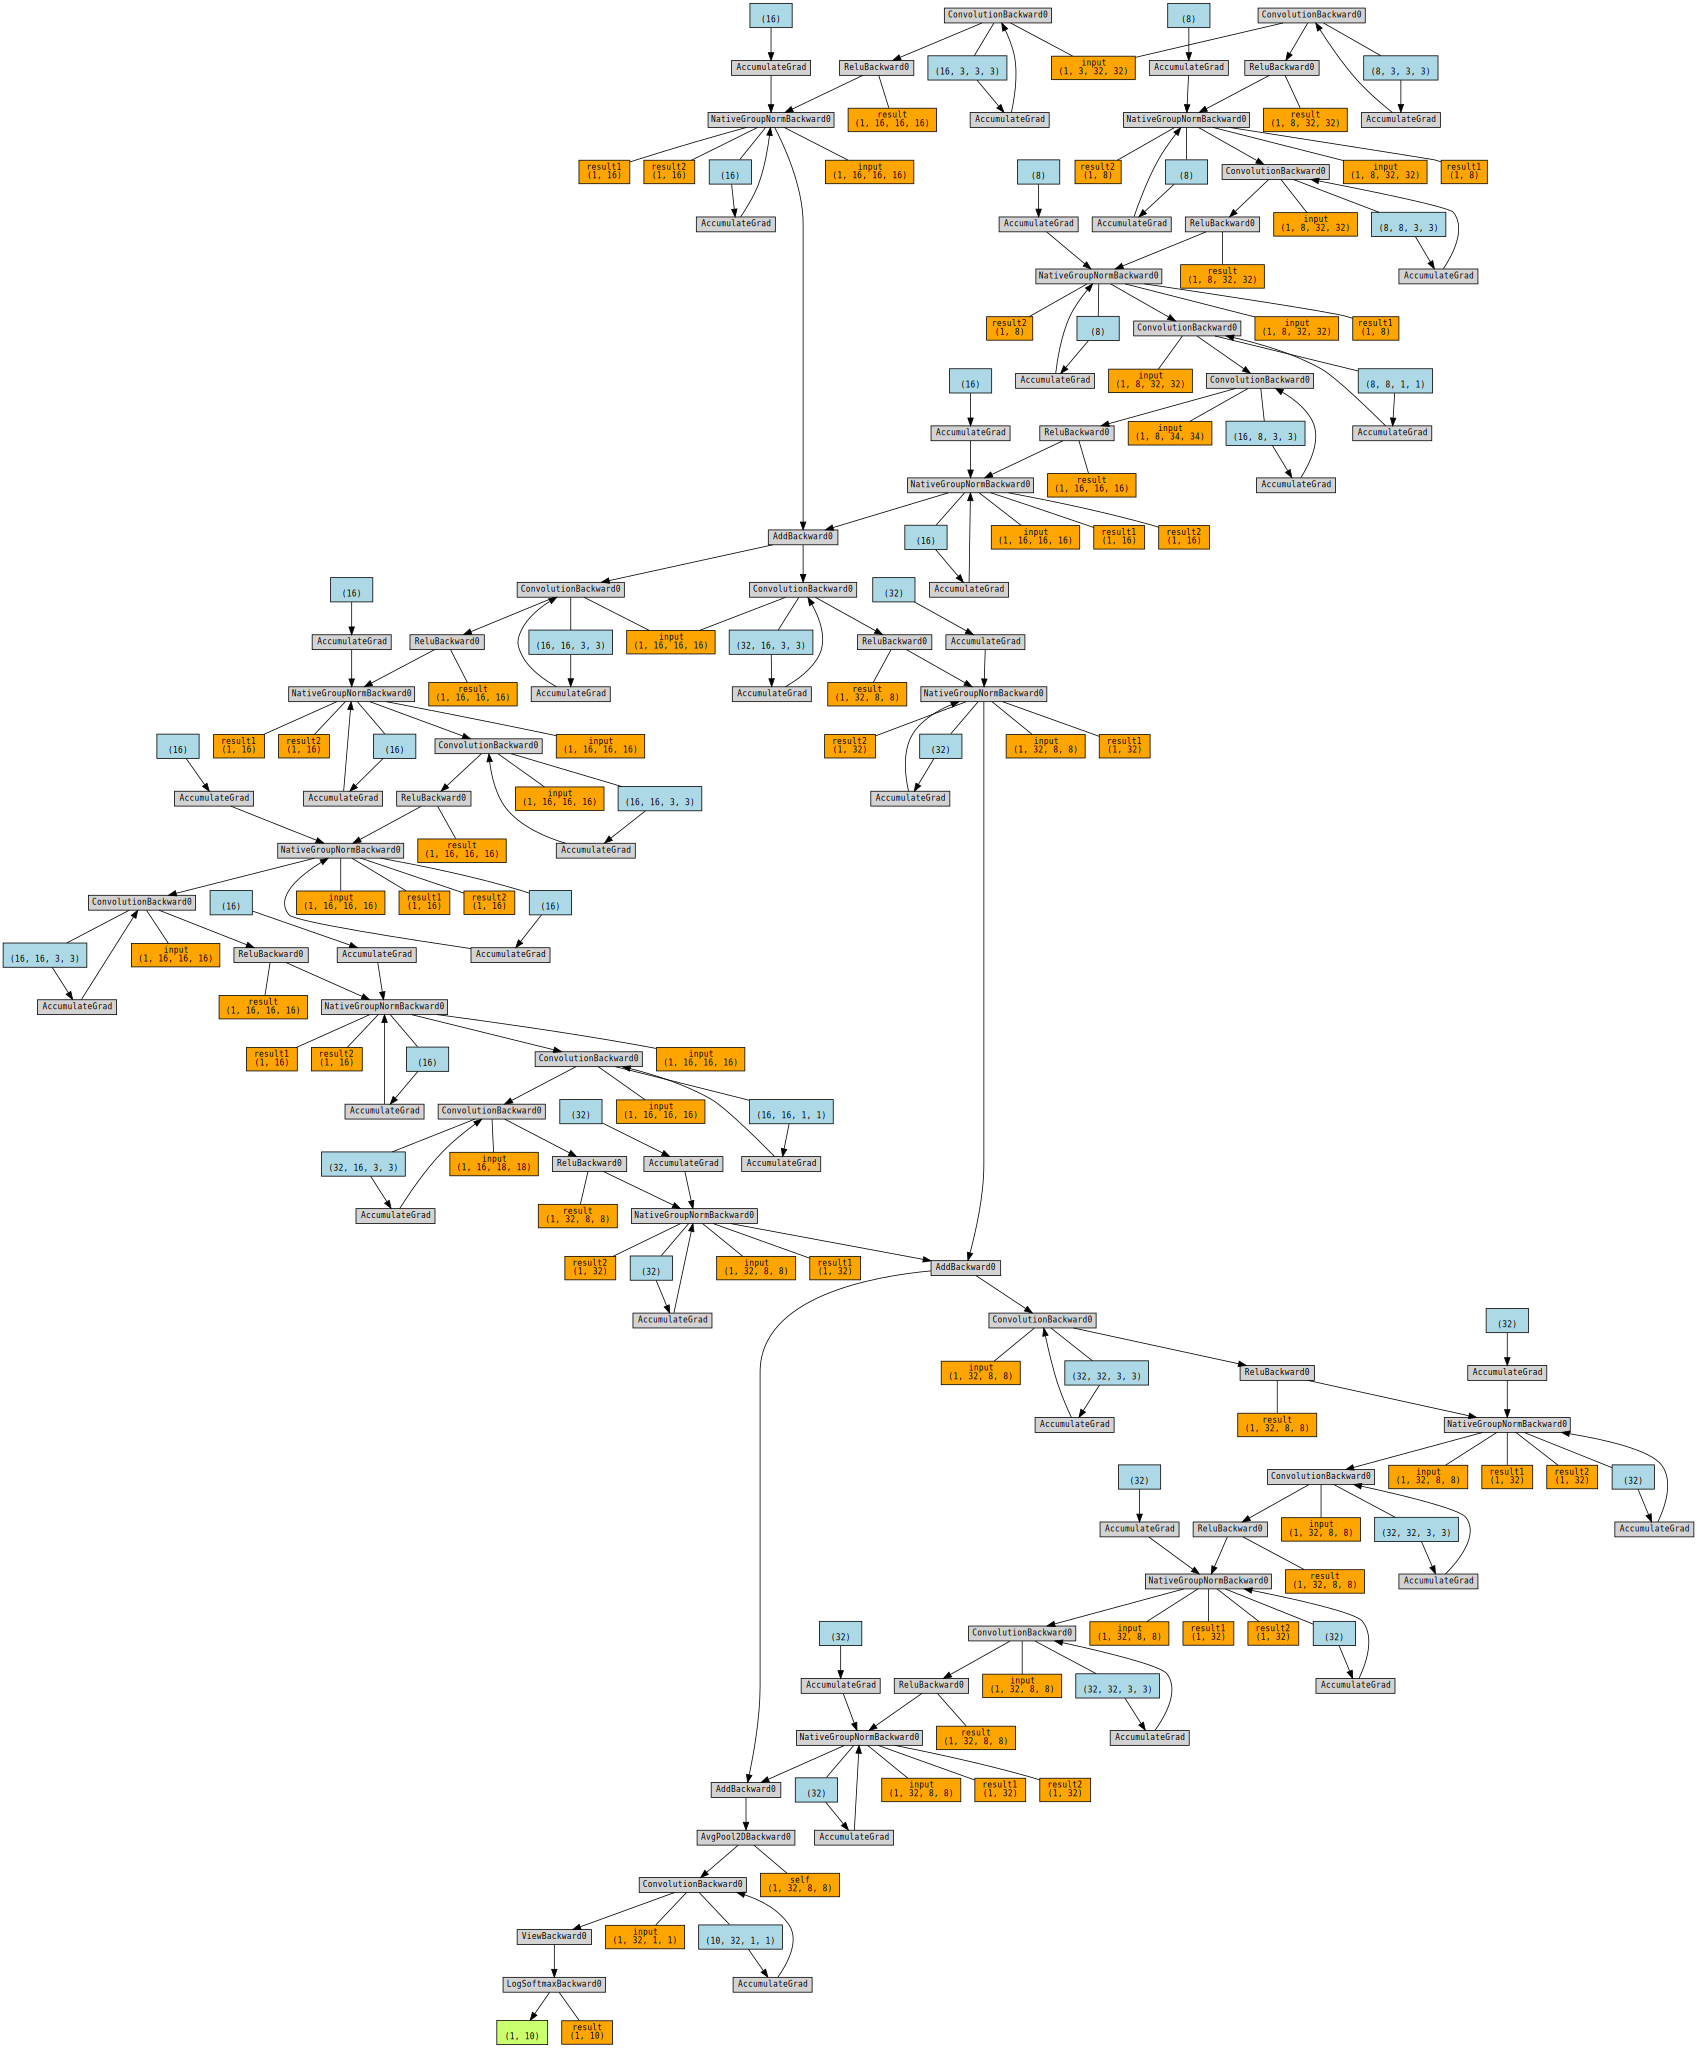

In [33]:
random_input = torch.randn(1, 3, 32, 32)
model.eval()
y = model(random_input)
dot_graph = make_dot(y, show_attrs=False, show_saved=True)
dot_graph.format = 'svg'
dot_graph.render(f'net')
dot_graph

## Training

In [48]:
model = Net().to(device)

In [49]:
import torch.optim as optim

In [50]:
labels = {0: 'airplane',
          1: 'automobile',
          2: 'bird',
          3: 'cat',
          4: 'deer',
          5: 'dog',
          6: 'frog',
          7: 'horse',
          8: 'ship',
          9: 'truck'}

In [51]:
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)
num_epochs = 20

metrics = { 'train_acc': [], 'train_losses': [],
            'test_acc': [], 'test_losses': [] }

for epoch in range(1, num_epochs + 1):
    print(f'Epoch {epoch}')
    U.train(model, device, train_dataloader, optimizer, metrics)
    U.test(model, device, test_dataloader, metrics, labels, get_misclassified=(epoch == num_epochs))
    # break
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=1.5831 Batch_id=390 Accuracy=34.52: 100%|██████████| 391/391 [00:19<00:00, 19.61it/s]


              precision    recall  f1-score   support

    airplane       0.54      0.37      0.44      1000
  automobile       0.42      0.74      0.54      1000
        bird       0.49      0.13      0.21      1000
         cat       0.34      0.31      0.33      1000
        deer       0.41      0.32      0.36      1000
         dog       0.42      0.31      0.36      1000
        frog       0.44      0.57      0.50      1000
       horse       0.50      0.58      0.54      1000
        ship       0.47      0.75      0.58      1000
       truck       0.48      0.40      0.44      1000

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.43     10000
weighted avg       0.45      0.45      0.43     10000

Test set: Average loss: 1.5091, Accuracy: 4486/10000 (44.86%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2


Train: Loss=1.4112 Batch_id=390 Accuracy=45.70: 100%|██████████| 391/391 [00:20<00:00, 19.44it/s]


              precision    recall  f1-score   support

    airplane       0.57      0.60      0.59      1000
  automobile       0.65      0.71      0.68      1000
        bird       0.45      0.37      0.40      1000
         cat       0.36      0.22      0.27      1000
        deer       0.44      0.39      0.41      1000
         dog       0.38      0.57      0.46      1000
        frog       0.47      0.76      0.58      1000
       horse       0.71      0.52      0.60      1000
        ship       0.59      0.72      0.65      1000
       truck       0.75      0.37      0.49      1000

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.51     10000
weighted avg       0.54      0.52      0.51     10000

Test set: Average loss: 1.2970, Accuracy: 5229/10000 (52.29%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3


Train: Loss=1.1579 Batch_id=390 Accuracy=51.14: 100%|██████████| 391/391 [00:19<00:00, 20.56it/s]


              precision    recall  f1-score   support

    airplane       0.70      0.51      0.59      1000
  automobile       0.78      0.62      0.69      1000
        bird       0.51      0.45      0.48      1000
         cat       0.51      0.21      0.30      1000
        deer       0.50      0.46      0.48      1000
         dog       0.52      0.56      0.54      1000
        frog       0.48      0.85      0.61      1000
       horse       0.69      0.64      0.67      1000
        ship       0.64      0.79      0.71      1000
       truck       0.60      0.74      0.66      1000

    accuracy                           0.58     10000
   macro avg       0.59      0.58      0.57     10000
weighted avg       0.59      0.58      0.57     10000

Test set: Average loss: 1.1574, Accuracy: 5834/10000 (58.34%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4


Train: Loss=1.1086 Batch_id=390 Accuracy=54.95: 100%|██████████| 391/391 [00:20<00:00, 19.02it/s]


              precision    recall  f1-score   support

    airplane       0.65      0.68      0.66      1000
  automobile       0.72      0.81      0.76      1000
        bird       0.57      0.41      0.48      1000
         cat       0.40      0.55      0.46      1000
        deer       0.63      0.43      0.51      1000
         dog       0.53      0.43      0.47      1000
        frog       0.52      0.82      0.64      1000
       horse       0.67      0.69      0.68      1000
        ship       0.77      0.68      0.72      1000
       truck       0.78      0.61      0.69      1000

    accuracy                           0.61     10000
   macro avg       0.63      0.61      0.61     10000
weighted avg       0.63      0.61      0.61     10000

Test set: Average loss: 1.0917, Accuracy: 6107/10000 (61.07%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5


Train: Loss=1.0333 Batch_id=390 Accuracy=57.13: 100%|██████████| 391/391 [00:20<00:00, 19.08it/s]


              precision    recall  f1-score   support

    airplane       0.67      0.66      0.66      1000
  automobile       0.75      0.84      0.79      1000
        bird       0.61      0.49      0.54      1000
         cat       0.45      0.42      0.43      1000
        deer       0.64      0.58      0.61      1000
         dog       0.50      0.67      0.57      1000
        frog       0.70      0.71      0.70      1000
       horse       0.75      0.67      0.71      1000
        ship       0.73      0.80      0.76      1000
       truck       0.76      0.70      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

Test set: Average loss: 0.9929, Accuracy: 6536/10000 (65.36%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 6


Train: Loss=1.3768 Batch_id=390 Accuracy=59.08: 100%|██████████| 391/391 [00:20<00:00, 19.43it/s]


              precision    recall  f1-score   support

    airplane       0.78      0.58      0.67      1000
  automobile       0.84      0.73      0.78      1000
        bird       0.47      0.61      0.53      1000
         cat       0.48      0.36      0.41      1000
        deer       0.70      0.43      0.53      1000
         dog       0.56      0.61      0.58      1000
        frog       0.52      0.88      0.65      1000
       horse       0.83      0.62      0.71      1000
        ship       0.78      0.79      0.78      1000
       truck       0.67      0.82      0.74      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000

Test set: Average loss: 1.0060, Accuracy: 6417/10000 (64.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.9245 Batch_id=390 Accuracy=64.04: 100%|██████████| 391/391 [00:19<00:00, 20.09it/s]


              precision    recall  f1-score   support

    airplane       0.68      0.76      0.71      1000
  automobile       0.80      0.86      0.83      1000
        bird       0.58      0.58      0.58      1000
         cat       0.51      0.44      0.47      1000
        deer       0.70      0.59      0.64      1000
         dog       0.56      0.62      0.59      1000
        frog       0.75      0.76      0.76      1000
       horse       0.73      0.75      0.74      1000
        ship       0.80      0.79      0.79      1000
       truck       0.78      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

Test set: Average loss: 0.8701, Accuracy: 6895/10000 (68.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.9433 Batch_id=390 Accuracy=64.71: 100%|██████████| 391/391 [00:20<00:00, 19.53it/s]


              precision    recall  f1-score   support

    airplane       0.71      0.70      0.71      1000
  automobile       0.83      0.81      0.82      1000
        bird       0.64      0.54      0.59      1000
         cat       0.48      0.50      0.49      1000
        deer       0.69      0.63      0.66      1000
         dog       0.57      0.60      0.59      1000
        frog       0.72      0.78      0.75      1000
       horse       0.76      0.73      0.75      1000
        ship       0.78      0.81      0.80      1000
       truck       0.73      0.82      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

Test set: Average loss: 0.8557, Accuracy: 6924/10000 (69.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.7612 Batch_id=390 Accuracy=65.83: 100%|██████████| 391/391 [00:20<00:00, 19.12it/s]


              precision    recall  f1-score   support

    airplane       0.68      0.74      0.71      1000
  automobile       0.82      0.83      0.83      1000
        bird       0.66      0.54      0.59      1000
         cat       0.53      0.42      0.47      1000
        deer       0.72      0.58      0.64      1000
         dog       0.54      0.67      0.60      1000
        frog       0.70      0.80      0.75      1000
       horse       0.72      0.76      0.74      1000
        ship       0.81      0.78      0.80      1000
       truck       0.74      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

Test set: Average loss: 0.8480, Accuracy: 6924/10000 (69.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=1.1830 Batch_id=390 Accuracy=65.93: 100%|██████████| 391/391 [00:20<00:00, 18.95it/s]


              precision    recall  f1-score   support

    airplane       0.72      0.72      0.72      1000
  automobile       0.79      0.87      0.83      1000
        bird       0.63      0.57      0.60      1000
         cat       0.53      0.47      0.50      1000
        deer       0.67      0.64      0.66      1000
         dog       0.61      0.56      0.58      1000
        frog       0.73      0.79      0.76      1000
       horse       0.69      0.79      0.74      1000
        ship       0.80      0.80      0.80      1000
       truck       0.77      0.79      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.69      0.70      0.70     10000
weighted avg       0.69      0.70      0.70     10000

Test set: Average loss: 0.8364, Accuracy: 6990/10000 (69.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.9397 Batch_id=390 Accuracy=66.26: 100%|██████████| 391/391 [00:20<00:00, 18.65it/s]


              precision    recall  f1-score   support

    airplane       0.76      0.69      0.72      1000
  automobile       0.80      0.85      0.82      1000
        bird       0.69      0.52      0.59      1000
         cat       0.54      0.39      0.46      1000
        deer       0.69      0.62      0.65      1000
         dog       0.52      0.73      0.61      1000
        frog       0.73      0.79      0.76      1000
       horse       0.71      0.78      0.74      1000
        ship       0.81      0.79      0.80      1000
       truck       0.74      0.82      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

Test set: Average loss: 0.8397, Accuracy: 6981/10000 (69.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=1.1563 Batch_id=390 Accuracy=66.38: 100%|██████████| 391/391 [00:19<00:00, 20.07it/s]


              precision    recall  f1-score   support

    airplane       0.73      0.71      0.72      1000
  automobile       0.78      0.89      0.83      1000
        bird       0.64      0.57      0.60      1000
         cat       0.52      0.49      0.50      1000
        deer       0.68      0.69      0.68      1000
         dog       0.59      0.60      0.60      1000
        frog       0.73      0.80      0.76      1000
       horse       0.78      0.74      0.76      1000
        ship       0.81      0.80      0.80      1000
       truck       0.80      0.78      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.70      0.71      0.70     10000
weighted avg       0.70      0.71      0.70     10000

Test set: Average loss: 0.8199, Accuracy: 7061/10000 (70.61%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=1.0527 Batch_id=390 Accuracy=66.84: 100%|██████████| 391/391 [00:19<00:00, 20.17it/s]


              precision    recall  f1-score   support

    airplane       0.72      0.74      0.73      1000
  automobile       0.80      0.86      0.83      1000
        bird       0.63      0.58      0.61      1000
         cat       0.52      0.45      0.49      1000
        deer       0.72      0.62      0.66      1000
         dog       0.57      0.65      0.60      1000
        frog       0.73      0.79      0.76      1000
       horse       0.77      0.76      0.76      1000
        ship       0.80      0.80      0.80      1000
       truck       0.78      0.80      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.70      0.71      0.70     10000
weighted avg       0.70      0.71      0.70     10000

Test set: Average loss: 0.8151, Accuracy: 7064/10000 (70.64%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.9711 Batch_id=390 Accuracy=67.14: 100%|██████████| 391/391 [00:20<00:00, 19.49it/s]


              precision    recall  f1-score   support

    airplane       0.72      0.74      0.73      1000
  automobile       0.81      0.85      0.83      1000
        bird       0.64      0.58      0.61      1000
         cat       0.52      0.46      0.49      1000
        deer       0.71      0.62      0.66      1000
         dog       0.56      0.64      0.60      1000
        frog       0.74      0.80      0.76      1000
       horse       0.76      0.76      0.76      1000
        ship       0.81      0.79      0.80      1000
       truck       0.77      0.81      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.70      0.71      0.70     10000
weighted avg       0.70      0.71      0.70     10000

Test set: Average loss: 0.8142, Accuracy: 7058/10000 (70.58%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.8025 Batch_id=390 Accuracy=67.17: 100%|██████████| 391/391 [00:18<00:00, 20.59it/s]


              precision    recall  f1-score   support

    airplane       0.72      0.74      0.73      1000
  automobile       0.80      0.87      0.83      1000
        bird       0.63      0.59      0.61      1000
         cat       0.53      0.47      0.50      1000
        deer       0.72      0.61      0.66      1000
         dog       0.57      0.64      0.60      1000
        frog       0.74      0.79      0.76      1000
       horse       0.75      0.77      0.76      1000
        ship       0.81      0.80      0.80      1000
       truck       0.78      0.80      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.70      0.71      0.70     10000
weighted avg       0.70      0.71      0.70     10000

Test set: Average loss: 0.8134, Accuracy: 7063/10000 (70.63%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.9493 Batch_id=390 Accuracy=67.32: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]


              precision    recall  f1-score   support

    airplane       0.73      0.73      0.73      1000
  automobile       0.81      0.85      0.83      1000
        bird       0.64      0.57      0.60      1000
         cat       0.52      0.47      0.49      1000
        deer       0.71      0.62      0.66      1000
         dog       0.57      0.64      0.60      1000
        frog       0.73      0.80      0.76      1000
       horse       0.75      0.77      0.76      1000
        ship       0.81      0.80      0.80      1000
       truck       0.77      0.81      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.70      0.71      0.70     10000
weighted avg       0.70      0.71      0.70     10000

Test set: Average loss: 0.8125, Accuracy: 7059/10000 (70.59%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.9236 Batch_id=390 Accuracy=67.00: 100%|██████████| 391/391 [00:19<00:00, 20.07it/s]


              precision    recall  f1-score   support

    airplane       0.73      0.73      0.73      1000
  automobile       0.82      0.85      0.83      1000
        bird       0.65      0.56      0.60      1000
         cat       0.52      0.46      0.49      1000
        deer       0.70      0.64      0.67      1000
         dog       0.57      0.62      0.60      1000
        frog       0.73      0.80      0.76      1000
       horse       0.75      0.77      0.76      1000
        ship       0.80      0.80      0.80      1000
       truck       0.76      0.82      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.70      0.71      0.70     10000
weighted avg       0.70      0.71      0.70     10000

Test set: Average loss: 0.8101, Accuracy: 7070/10000 (70.70%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.9608 Batch_id=390 Accuracy=67.46: 100%|██████████| 391/391 [00:20<00:00, 19.47it/s]


              precision    recall  f1-score   support

    airplane       0.73      0.73      0.73      1000
  automobile       0.81      0.85      0.83      1000
        bird       0.64      0.56      0.60      1000
         cat       0.52      0.48      0.50      1000
        deer       0.70      0.64      0.67      1000
         dog       0.58      0.64      0.61      1000
        frog       0.73      0.80      0.76      1000
       horse       0.76      0.76      0.76      1000
        ship       0.80      0.81      0.81      1000
       truck       0.79      0.80      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

Test set: Average loss: 0.8087, Accuracy: 7083/10000 (70.83%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 19


Train: Loss=1.0115 Batch_id=390 Accuracy=67.53: 100%|██████████| 391/391 [00:18<00:00, 20.75it/s]


              precision    recall  f1-score   support

    airplane       0.73      0.74      0.73      1000
  automobile       0.81      0.85      0.83      1000
        bird       0.64      0.56      0.60      1000
         cat       0.53      0.47      0.49      1000
        deer       0.71      0.64      0.67      1000
         dog       0.58      0.63      0.60      1000
        frog       0.73      0.80      0.76      1000
       horse       0.75      0.77      0.76      1000
        ship       0.81      0.80      0.80      1000
       truck       0.77      0.81      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.70      0.71      0.70     10000
weighted avg       0.70      0.71      0.70     10000

Test set: Average loss: 0.8096, Accuracy: 7074/10000 (70.74%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 20


Train: Loss=0.9450 Batch_id=390 Accuracy=67.36: 100%|██████████| 391/391 [00:18<00:00, 20.81it/s]


              precision    recall  f1-score   support

    airplane       0.72      0.74      0.73      1000
  automobile       0.81      0.85      0.83      1000
        bird       0.64      0.57      0.60      1000
         cat       0.53      0.47      0.50      1000
        deer       0.71      0.64      0.67      1000
         dog       0.57      0.63      0.60      1000
        frog       0.73      0.80      0.76      1000
       horse       0.75      0.77      0.76      1000
        ship       0.81      0.80      0.80      1000
       truck       0.77      0.81      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.70      0.71      0.71     10000
weighted avg       0.70      0.71      0.71     10000

Test set: Average loss: 0.8093, Accuracy: 7078/10000 (70.78%)

Adjusting learning rate of group 0 to 1.0000e-04.


In [52]:
df_misclassified = pd.DataFrame(metrics['misclassified_data'])

In [53]:
df_misclassified.sample(n=10)

,pred,actual,data
1721,0,8,"[[[-1.9098394, -1.8780899, -1.8463404, -1.7669..."
1826,0,8,"[[[0.50311863, 0.45549446, 0.43961975, 0.47136..."
2201,3,8,"[[[2.027092, 2.0429666, 2.0588415, 2.0429666, ..."
1695,5,7,"[[[-1.989213, -1.989213, -1.9733382, -1.973338..."
593,7,2,"[[[1.9635931, 1.9794677, 1.9953425, 2.0112174,..."
991,5,7,"[[[0.12212531, 0.12212531, 0.15387475, 0.16974..."
2904,0,8,"[[[1.3127295, 1.2651052, 1.28098, 1.2968547, 1..."
1492,1,6,"[[[-0.8621076, -0.8621076, -0.83035815, -0.782..."
180,7,4,"[[[-1.2113516, -1.3859736, -1.3383493, -1.0843..."
2548,5,3,"[[[-0.33824176, -0.36999118, -0.35411647, -0.3..."


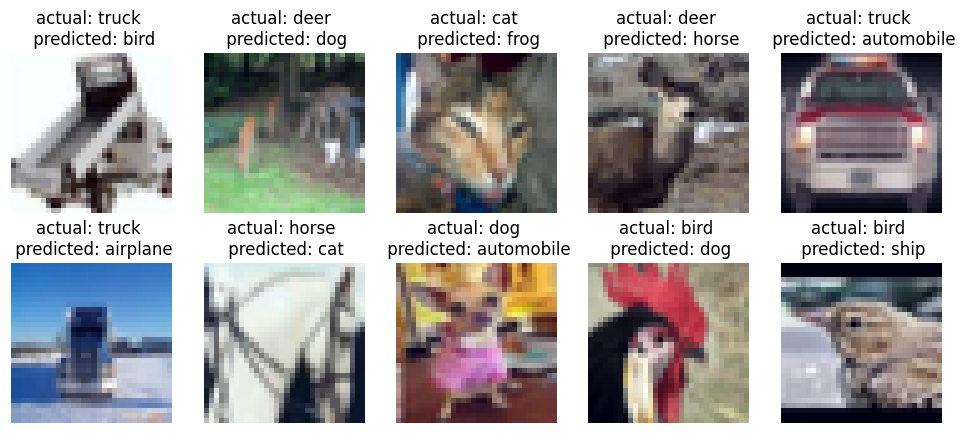

<Figure size 640x480 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

for i, row in df_misclassified.sample(n=10).reset_index(drop=True).iterrows():
    ax = plt.subplot(2, 5, i+1)
    plt.axis('off')

    img = row['data']
    img = (img - img.min()) / (img.max() - img.min())
    img = np.moveaxis(img * 255, [0, 1, 2], [2, 0, 1])
    plt.imshow(img.astype(int), cmap='jet')

    ax.set_title(f"actual: {labels[row['actual']]} \n predicted: {labels[row['pred']]}")

plt.show()
plt.savefig('failed_gn.jpg')

## Display Results

In [ ]:
df = pd.DataFrame({'train_losses': metrics['train_losses'], 'test_losses': metrics['test_losses']})

In [ ]:
df.plot()

In [ ]:
df = pd.DataFrame({'train_acc': metrics['train_acc'], 'test_acc': metrics['test_acc']})
df.plot()